In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
#The aim of this challenge is to predict the hourly energy output of a cyclic power plant based on given parameters
train=pd.read_csv(r'C:\Users\aalap\train_energy.csv')
train

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36
...,...,...,...,...,...
7995,18.74,45.09,1014.24,41.54,456.25
7996,15.43,40.89,1010.63,73.03,468.35
7997,12.36,52.75,1026.04,68.71,465.14
7998,25.98,73.18,1012.28,85.78,439.73


In [3]:
train.head(2)

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01


In [4]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
train.describe()

,AT,V,AP,RH,PE
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.677299,54.302629,1013.235534,73.260477,454.310364
std,7.448395,12.687358,5.920858,14.588452,17.056199
min,2.340000,25.360000,993.110000,25.560000,420.260000
25%,13.510000,41.740000,1009.070000,63.340000,439.727500
50%,20.320000,52.080000,1012.950000,74.880000,451.495000
75%,25.770000,66.540000,1017.190000,84.700000,468.400000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
import seaborn as sns

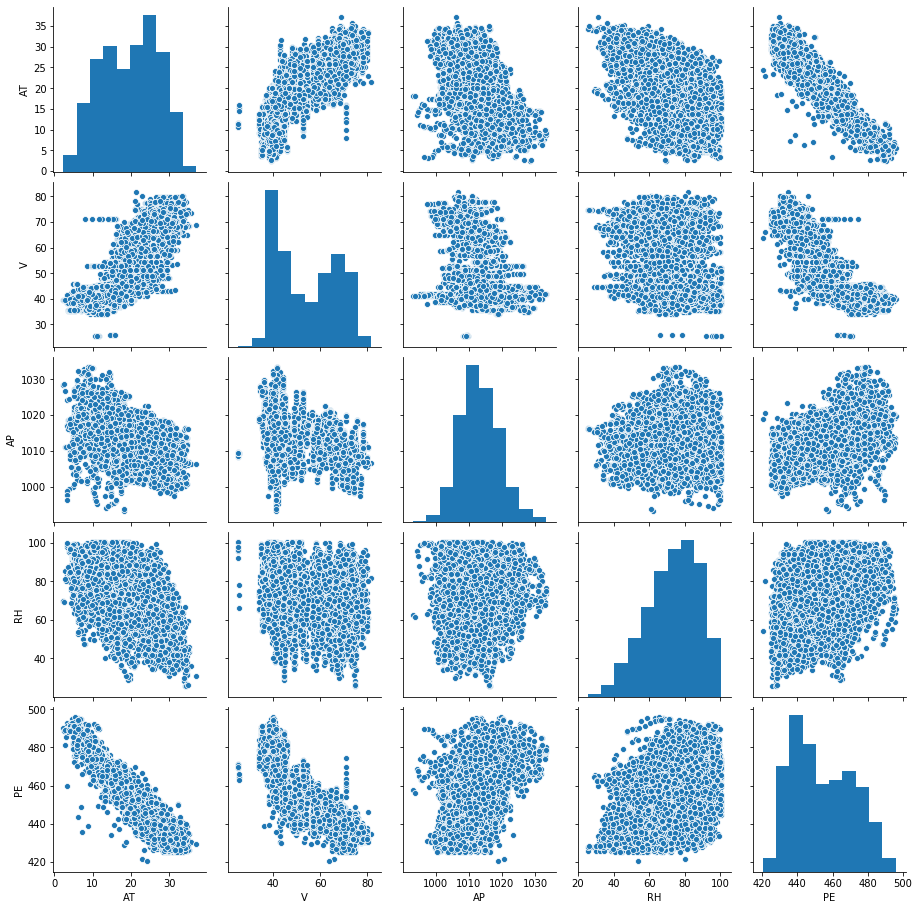

In [7]:
sns.pairplot(train)

In [8]:
X=train[['AT','V','AP','RH']]
y=train['PE']

In [9]:
X

,AT,V,AP,RH
0,22.85,60.29,1017.29,61.92
1,11.75,35.76,1018.99,57.92
2,12.24,44.90,1020.31,82.22
3,13.43,40.10,1015.82,87.90
4,4.65,35.19,1018.23,94.78
...,...,...,...,...
7995,18.74,45.09,1014.24,41.54
7996,15.43,40.89,1010.63,73.03
7997,12.36,52.75,1026.04,68.71
7998,25.98,73.18,1012.28,85.78


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForestRegressor

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfc.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [12]:
y_pred = rfc.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y))
print(np.sqrt(mean_squared_error(y_pred,y)))


0.9944529773921137
1.2548033278182515


# DecisionTreeRegressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [14]:
y_pred = dtr.predict(X)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y))
print(np.sqrt(mean_squared_error(y_pred,y)))

1.0
1.10076807294701e-15


In [15]:
test_df = pd.read_csv('test_energy.csv')
test_df

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88
...,...,...,...,...
1563,17.37,58.49,1012.20,91.14
1564,21.50,59.87,1019.05,76.56
1565,8.84,42.49,1010.28,89.09
1566,21.06,50.59,1016.42,66.12


In [22]:
prediction = rfc.predict(test_df)
prediction

array([475.2988, 488.0484, 463.077 , ..., 478.23  , 454.2913, 478.8121])

In [17]:
l=[]
for i in range(len(prediction)):
    l.append(i)

In [18]:
submission = pd.DataFrame(({
                            'Index':l,
                            'Value': prediction
}))

In [19]:
submission

,Index,Value
0,0,477.19
1,1,486.78
2,2,463.09
3,3,452.27
4,4,479.56
...,...,...
1563,1563,460.48
1564,1564,451.49
1565,1565,483.88
1566,1566,453.67


In [20]:
submission.to_csv('my_submission_file.csv', index=False)